In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir('/leonardo/home/userexternal/gesposi1/dropout_rel_assessment')
PWD=os.getcwd()
print(PWD)

PATH="./FSIM_N_HPC_ResnetDrop"

items = os.listdir(PATH) 

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)) and 'lyr0-20' in item)]

Final_report = pd.DataFrame()

for config in directories:
    merge_files_path = os.path.join(PATH,config)    
    # list_items = os.listdir(dir)
    # sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]
    # merge_files_path=os.path.join(dir,sim_dir[0])
    # print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[2])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)



/leonardo/home/userexternal/gesposi1/dropout_rel_assessment


In [3]:
Final_report.group[['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked']].sum(axis=1)

AttributeError: 'DataFrame' object has no attribute 'group'

<Axes: xlabel='bit_faulty_pos', ylabel='MRAD'>

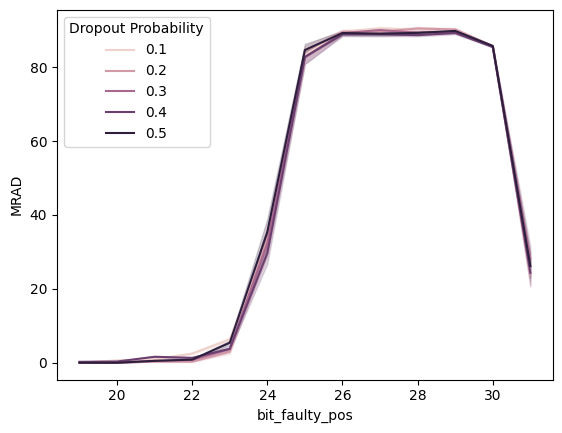

In [ ]:
sns.lineplot(data=Final_report, x='bit_faulty_pos', y='MRAD', hue='Dropout Probability')

<Axes: xlabel='bit_faulty_pos', ylabel='fault_ACC@1'>

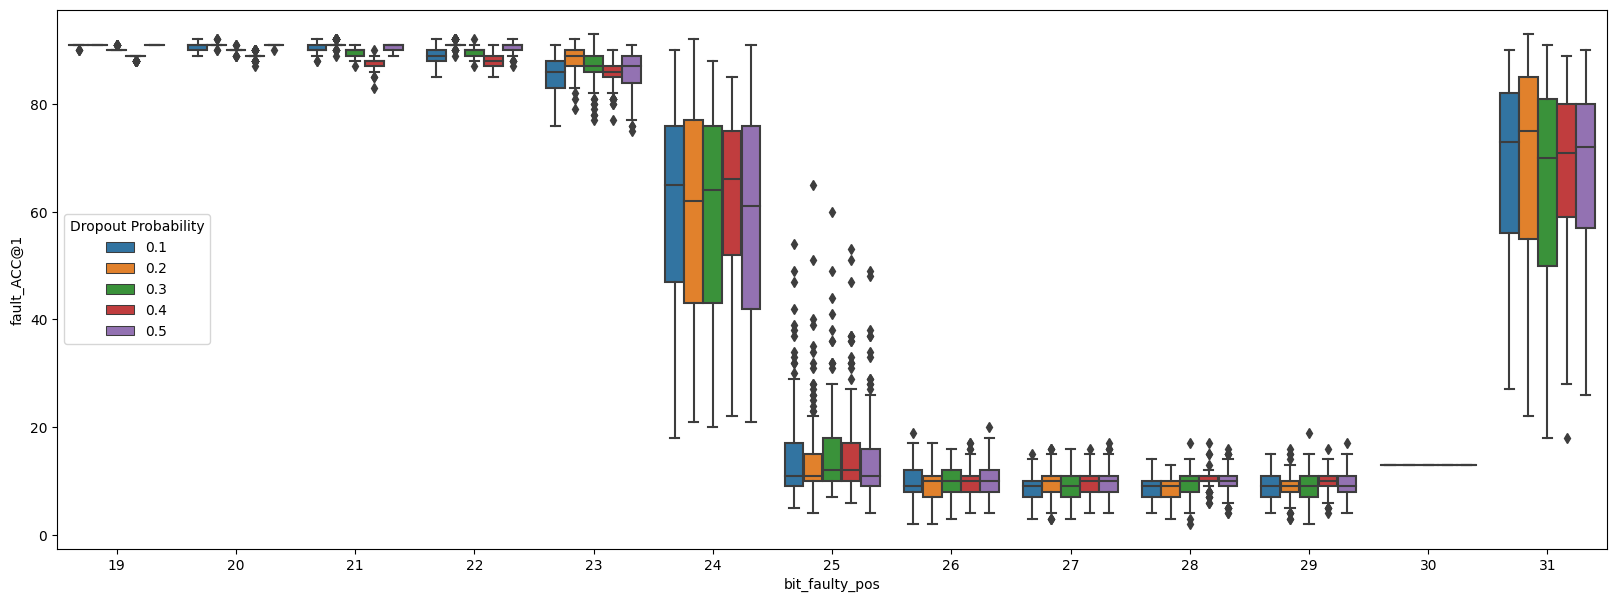

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(data=Final_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Dropout Probability', ax=ax)

In [ ]:
Final_report['fault_prec@1'].describe()

count    8125.000000
mean       48.790206
std        39.603184
min         0.303030
25%         5.284862
50%        62.567067
75%        88.984627
max        93.433440
Name: fault_prec@1, dtype: float64

<Axes: xlabel='fault_ACC@1', ylabel='Density'>

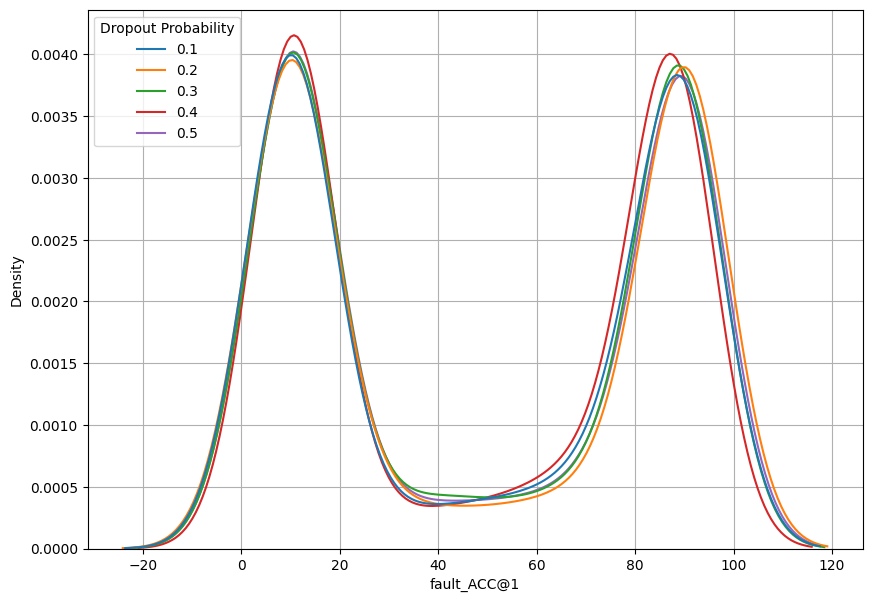

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.grid()
sns.kdeplot(data=Final_report, x='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)

I think that the high values of dropout works because the model does not become overconfident (something similar to overfitting is happening)
during training. During inference it works thanks to the scale. 

I think that the low values of dropout works because...

So the trade-off must be found

In [76]:
Final_report.columns

Index(['layer_start', 'layer_stop', 'size_tail_y', 'size_tail_x',
       'block_fault_rate', 'neuron_fault_rate', 'bit_faulty_pos',
       'Dropout Probability', 'gold_ACC@1', 'gold_ACC@k', 'img_Top1_Crit',
       'img_Top1_SDC', 'img_Top1_Masked', 'img_Topk_Crit', 'img_Topk_SDC',
       'img_Topk_Masked', 'fault_ACC@1', 'fault_ACC@k', 'Class_Top1',
       'Class_Topk', 'goldenf1_1', 'goldenf1_k', 'fault_f1@1', 'fault_f1@k',
       'goldenrec_1', 'goldenrec_k', 'fault_rec@1', 'fault_rec@k',
       'goldenprec_1', 'goldenprec_k', 'fault_prec@1', 'fault_prec@k', 'MRAD',
       'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'],
      dtype='object')

## Fault distribution

/scratch_local/ipykernel_3508231/743397835.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability'])['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked'].mean()


Text(0, 0.5, 'Faults (%)')

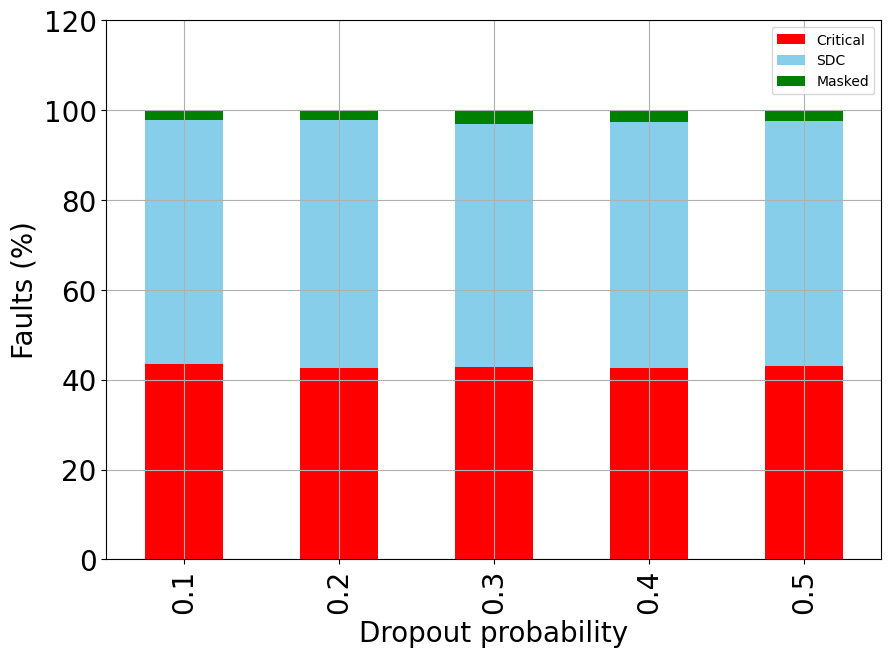

In [77]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability'])['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked'].mean()
fault_classification.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], ax = ax)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

/scratch_local/ipykernel_3508231/1905520805.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean()


Text(0, 0.5, 'Faults (%)')

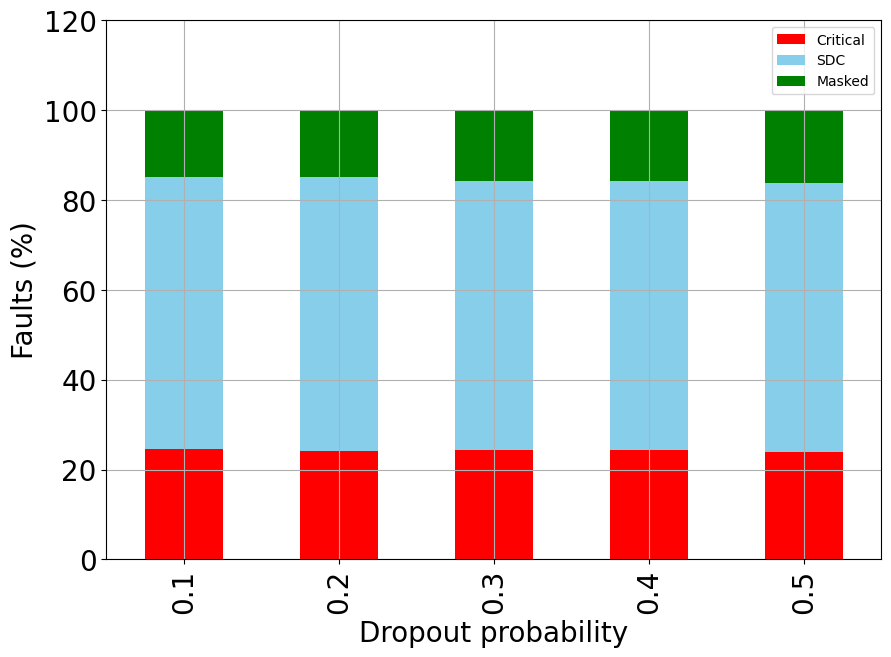

In [78]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean()
ax.grid()
fault_classification.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], ax = ax)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

/scratch_local/ipykernel_3508231/4096445670.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability', 'neuron_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()


Text(0, 0.5, 'Faults (%)')

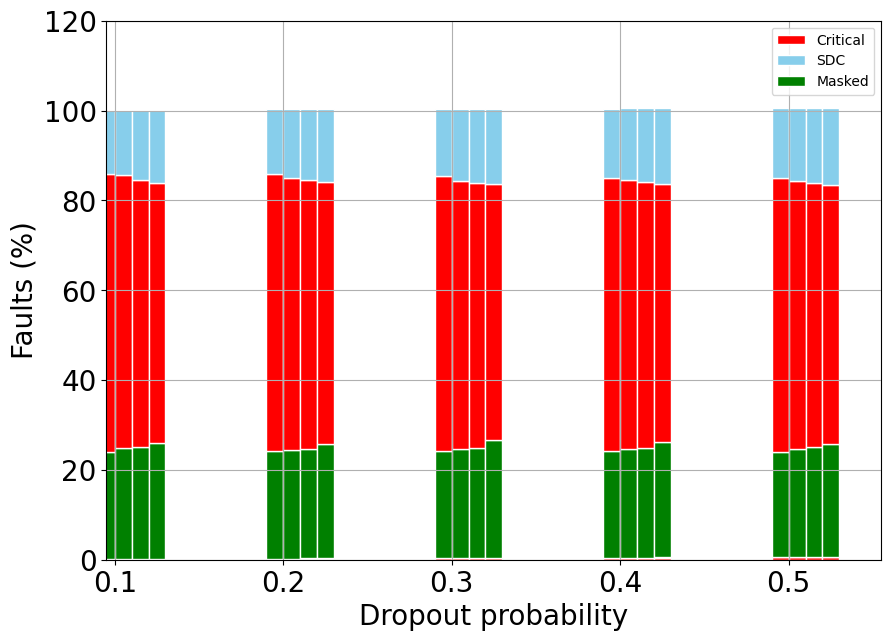

In [79]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability', 'neuron_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
ax.grid()

fault_classification_1 = fault_classification[fault_classification['neuron_fault_rate']==0.02]
fault_classification_2 = fault_classification[fault_classification['neuron_fault_rate']==0.04]
fault_classification_3 = fault_classification[fault_classification['neuron_fault_rate']==0.06]
fault_classification_4 = fault_classification[fault_classification['neuron_fault_rate']==0.08]
fault_classification_5 = fault_classification[fault_classification['neuron_fault_rate']==0.1]

fault_classification_1.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_3.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'] , position=0, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_4.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_5.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=[0.1, 0.2, 0.3, 0.4, 0.5], fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

/scratch_local/ipykernel_3508231/3290811390.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()


Text(0, 0.5, 'Faults (%)')

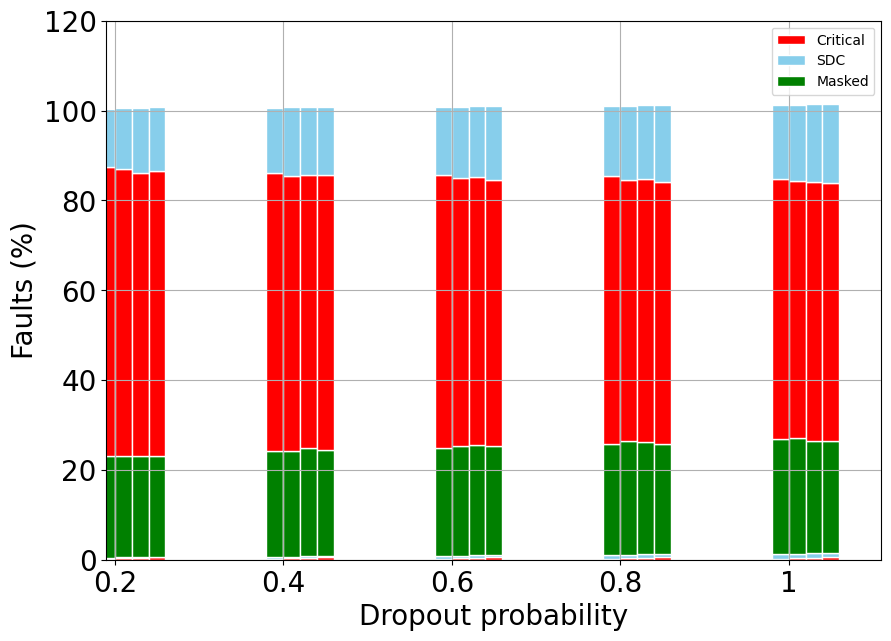

In [80]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
ax.grid()

fault_classification_1 = fault_classification[fault_classification['Dropout Probability']==0.1]
fault_classification_2 = fault_classification[fault_classification['Dropout Probability']==0.2]
fault_classification_3 = fault_classification[fault_classification['Dropout Probability']==0.3]
fault_classification_4 = fault_classification[fault_classification['Dropout Probability']==0.4]
fault_classification_5 = fault_classification[fault_classification['Dropout Probability']==0.5]

fault_classification_1.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_2.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_3.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'] , position=0, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_4.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-1, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)
fault_classification_5.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], position=-2, edgecolor='white', width=0.1, ax = ax, legend=False, rot=0)

ax.set_xlabel('Dropout probability', fontsize=20)
ax.grid()
ax.legend(labels=['Critical', 'SDC', 'Masked'])
ax.set_xticks(ticks=ax.get_xticks(), labels=[0.2, 0.4, 0.6, 0.8, 1], fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Faults (%)', fontsize=20)

In [81]:
Final_report.columns

Index(['layer_start', 'layer_stop', 'size_tail_y', 'size_tail_x',
       'block_fault_rate', 'neuron_fault_rate', 'bit_faulty_pos',
       'Dropout Probability', 'gold_ACC@1', 'gold_ACC@k', 'img_Top1_Crit',
       'img_Top1_SDC', 'img_Top1_Masked', 'img_Topk_Crit', 'img_Topk_SDC',
       'img_Topk_Masked', 'fault_ACC@1', 'fault_ACC@k', 'Class_Top1',
       'Class_Topk', 'goldenf1_1', 'goldenf1_k', 'fault_f1@1', 'fault_f1@k',
       'goldenrec_1', 'goldenrec_k', 'fault_rec@1', 'fault_rec@k',
       'goldenprec_1', 'goldenprec_k', 'fault_prec@1', 'fault_prec@k', 'MRAD',
       'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'],
      dtype='object')

## Accuracy drop

Text(0, 0.5, 'Accuracy (%)')

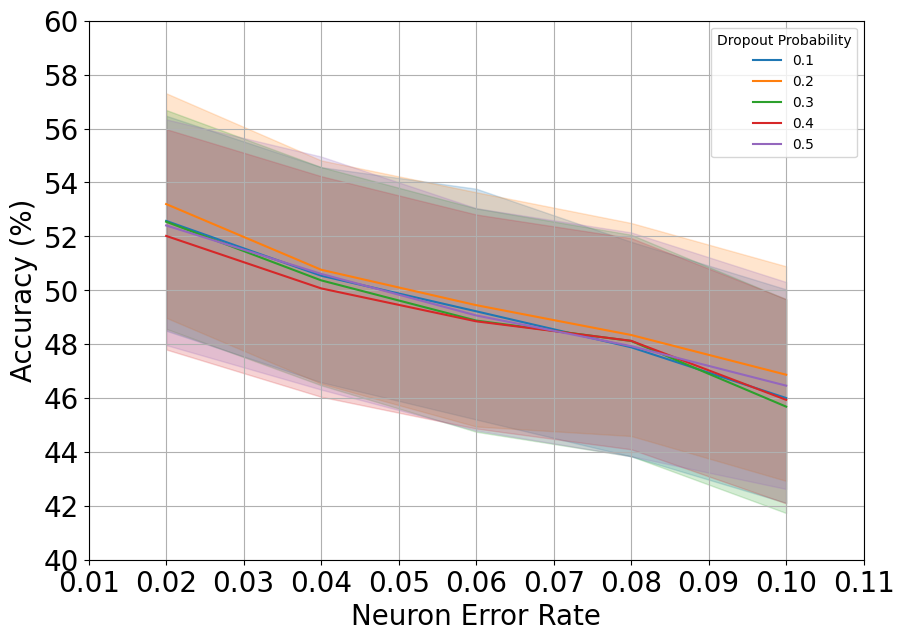

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)
# sns.scatterplot(data=Final_report, x='neuron_fault_rate',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)



ax.set_xlabel('Neuron Error Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

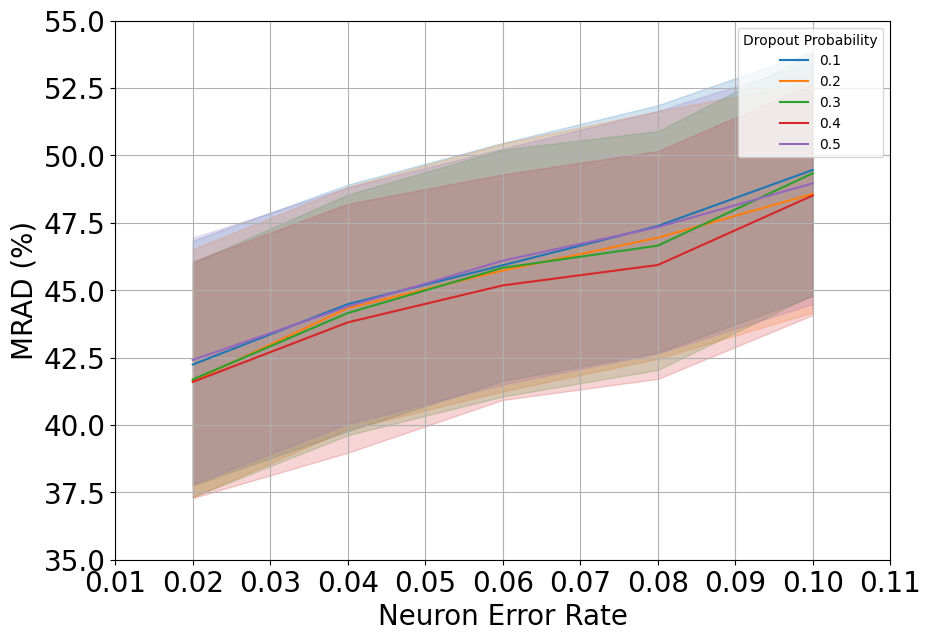

In [83]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='MRAD', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Neuron Error Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

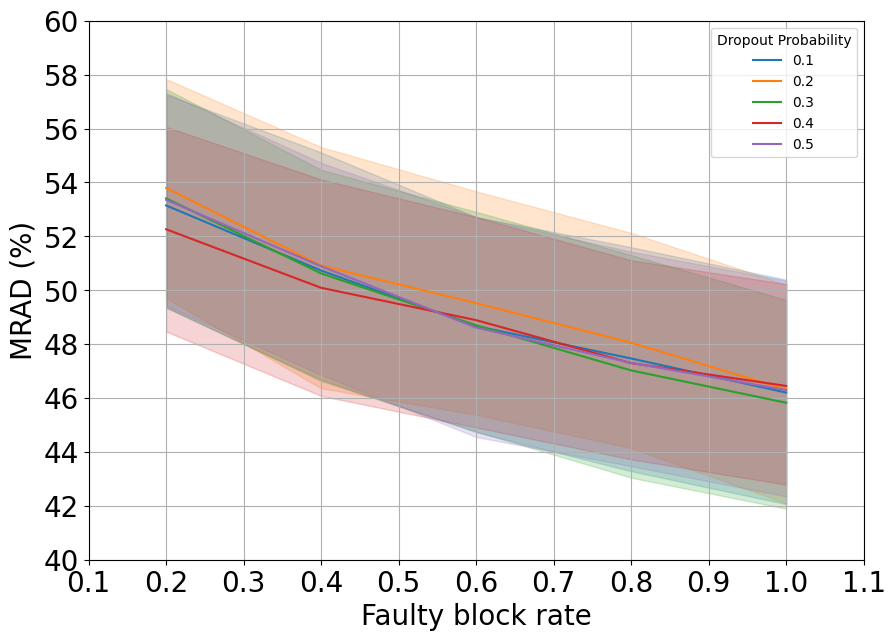

In [84]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'MRAD (%)')

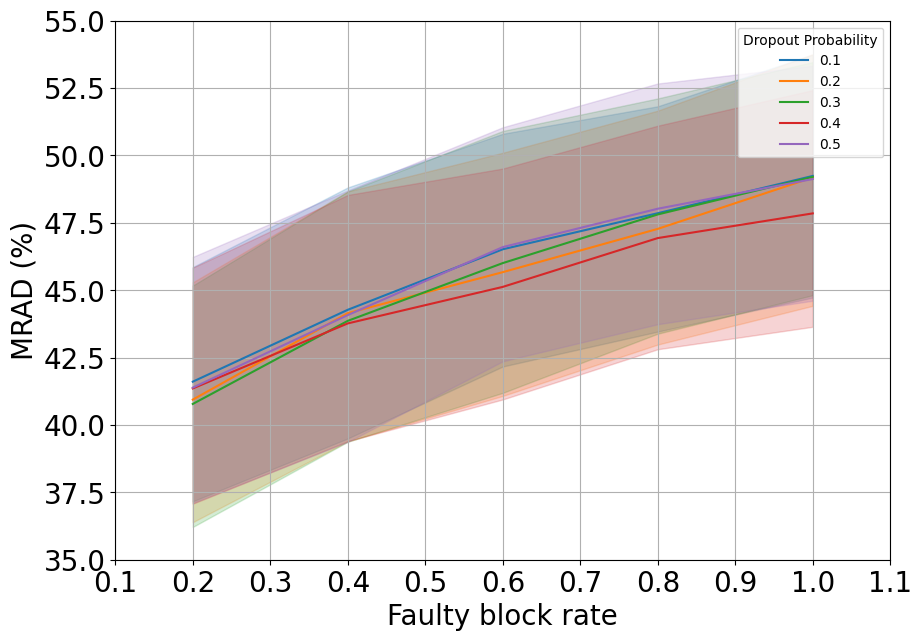

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='MRAD', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('MRAD (%)', fontsize=20)

Text(0, 0.5, 'Accuracy (%)')

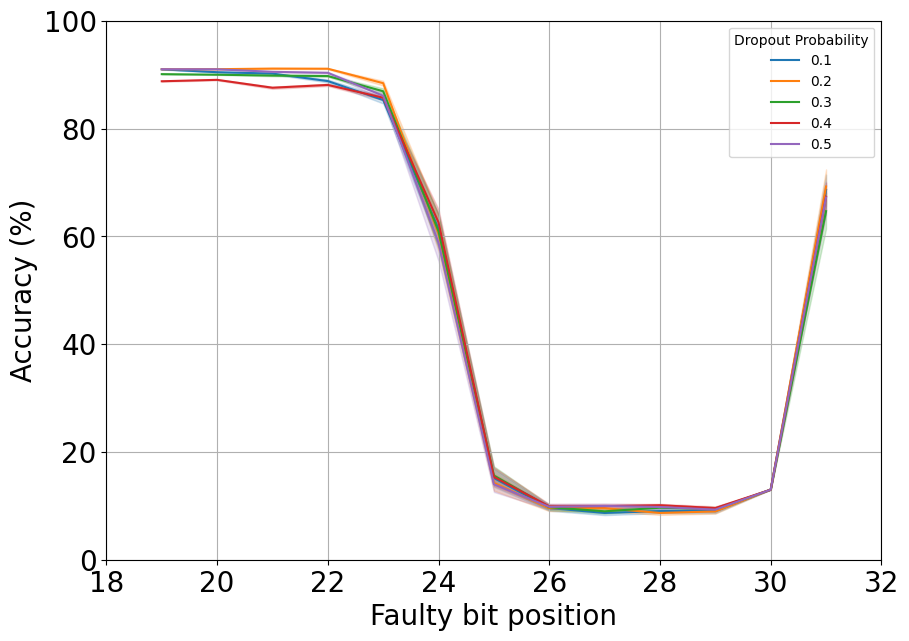

In [42]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_ACC@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

## F1 score, 
F1 score is more important becuase it gives insight about the generalization capabilities of the neural network and dropout should avoid overfitting, then improve generalization capabilities

Text(0, 0.5, 'F1 score (%)')

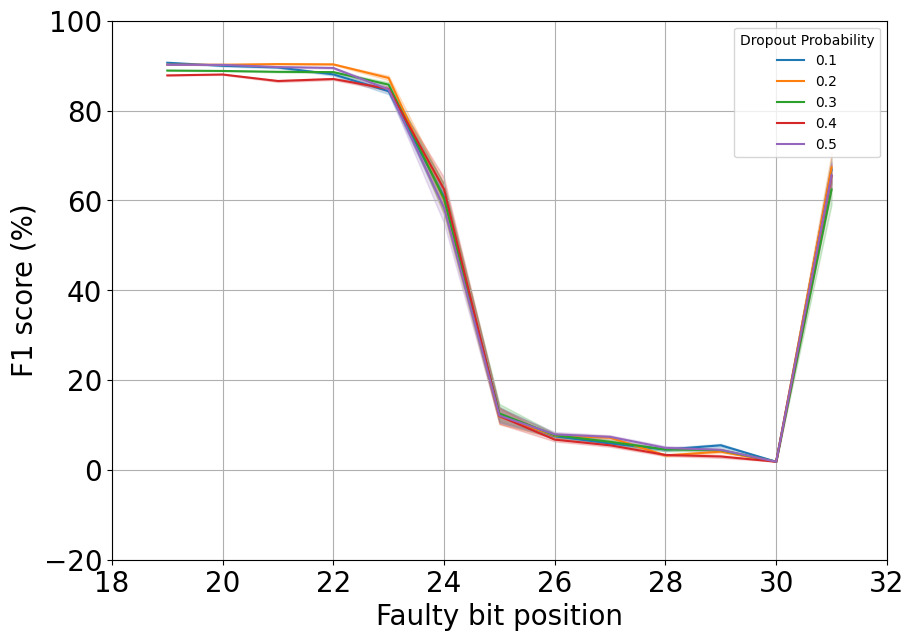

In [43]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

Text(0, 0.5, 'F1 score (%)')

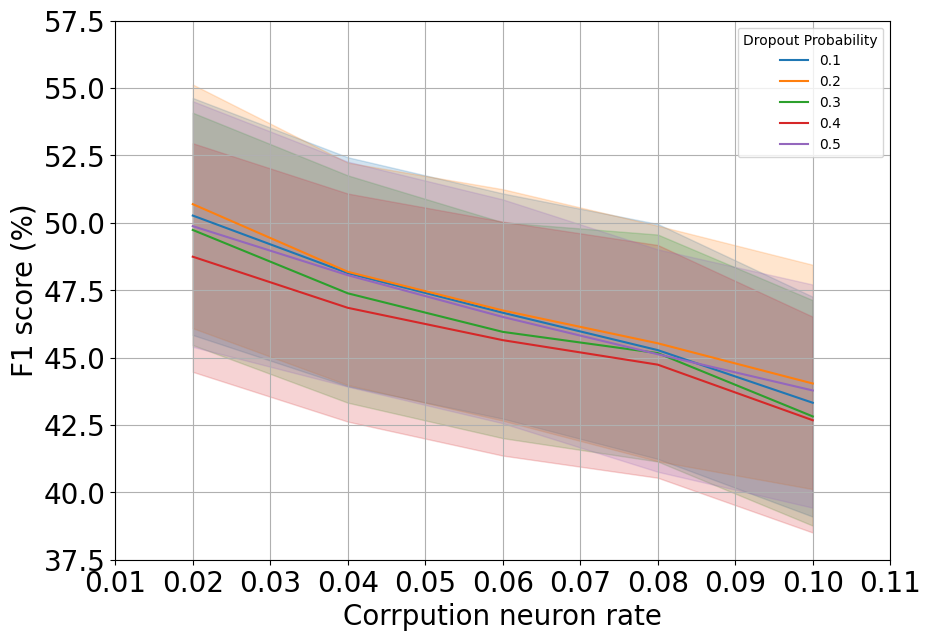

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='neuron_fault_rate',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Corrpution neuron rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

Text(0, 0.5, 'F1 score (%)')

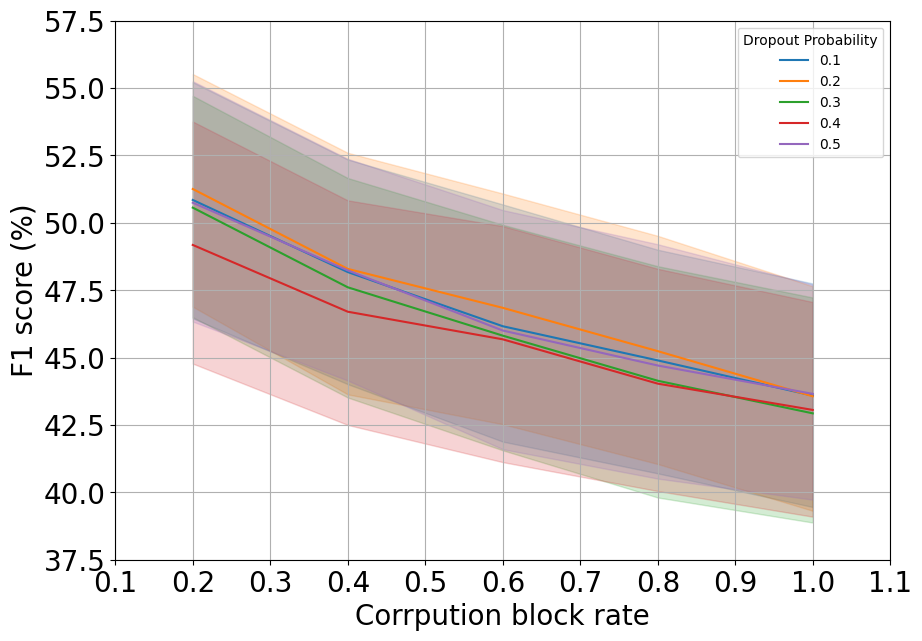

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='block_fault_rate',y='fault_f1@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Corrpution block rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('F1 score (%)', fontsize=20)

## Precision 

Text(0, 0.5, 'Precision (%)')

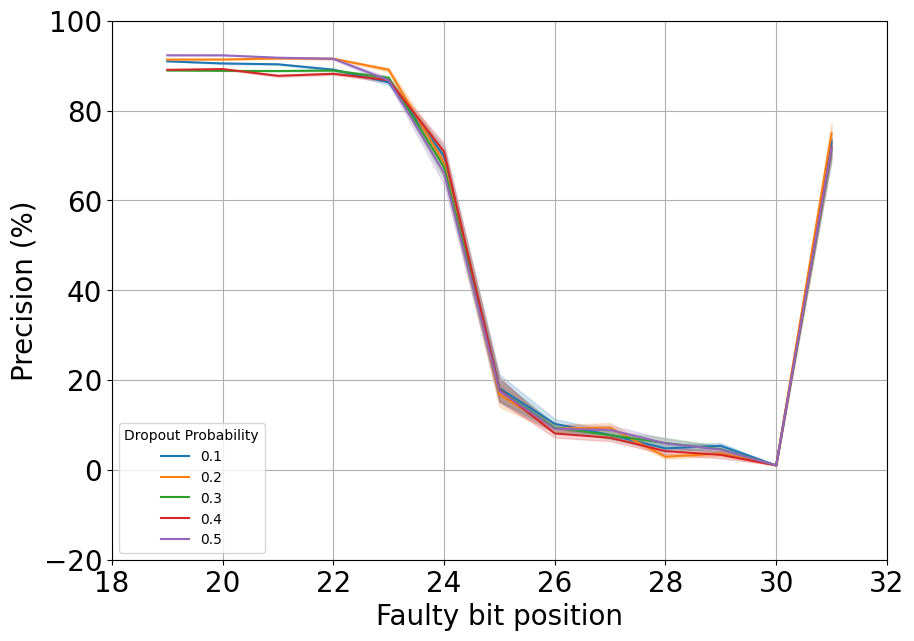

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_prec@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Precision (%)', fontsize=20)

## Recall

Text(0, 0.5, 'Recall (%)')

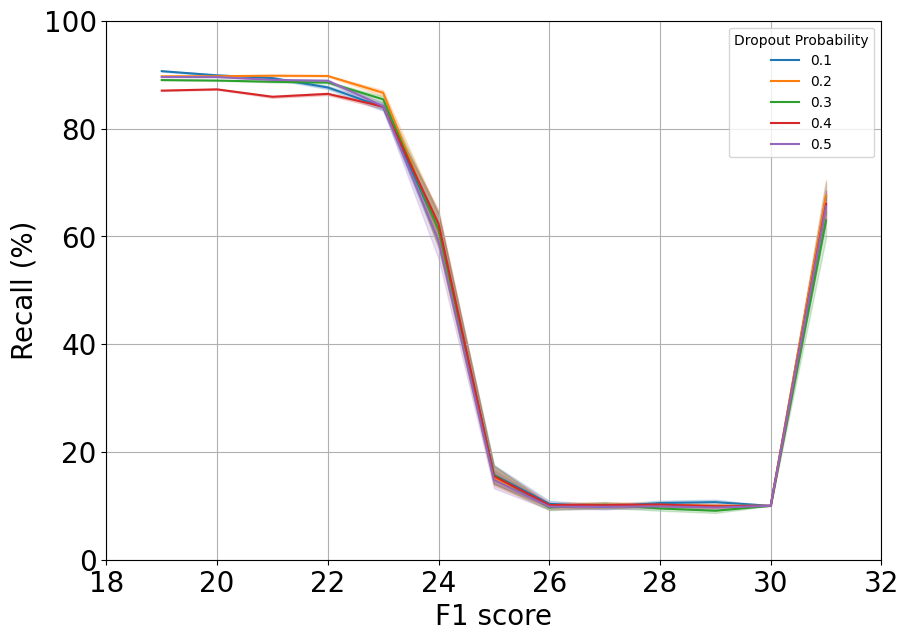

In [44]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax.grid()
# fault_classification = Final_report.groupby(['Dropout Probability', 'block_fault_rate'])['img_Topk_Crit', 'img_Topk_SDC', 'img_Topk_Masked'].mean().reset_index()
sns.lineplot(data=Final_report, x='bit_faulty_pos',y='fault_rec@1', hue='Dropout Probability', palette='tab10', ax = ax)


ax.set_xlabel('F1 score', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Recall (%)', fontsize=20)

## Bits 23, 24, 25 

As you might see from the following plor, those bits have more variability, then it is worth to isolate them to perform analysis

Text(0, 0.5, 'Accuracy (%)')

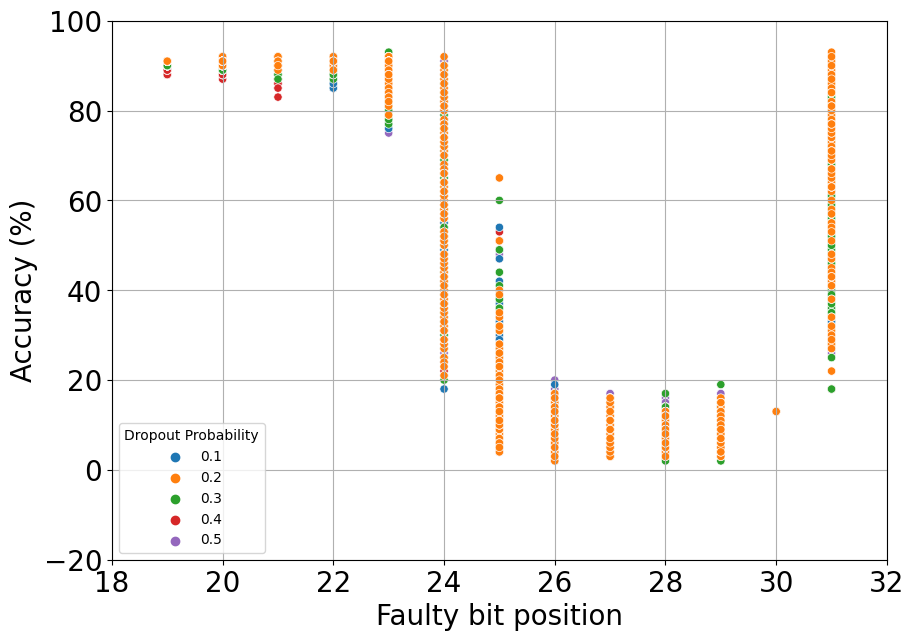

In [52]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.grid()
sns.scatterplot(data=Final_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Dropout Probability', palette='tab10')

ax.set_xlabel('Faulty bit position', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

## Accuracy

Text(0, 0.5, 'Accuracy (%)')

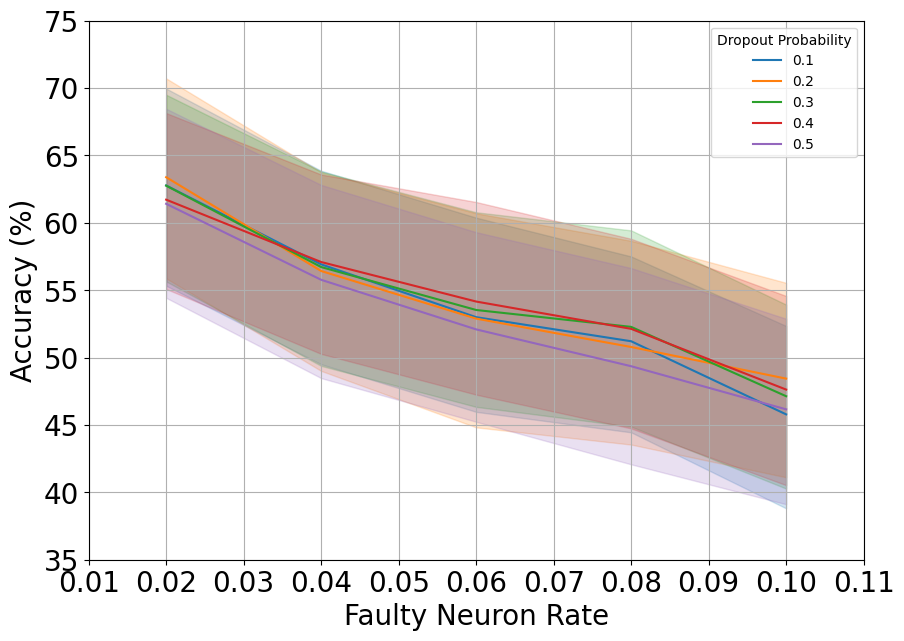

In [57]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.grid()
sns.lineplot(data=Final_report.query('bit_faulty_pos==23 or bit_faulty_pos==24 or bit_faulty_pos==25'), x='neuron_fault_rate', y='fault_ACC@1', hue='Dropout Probability', palette='tab10')

ax.set_xlabel('Faulty Neuron Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

Text(0, 0.5, 'Accuracy (%)')

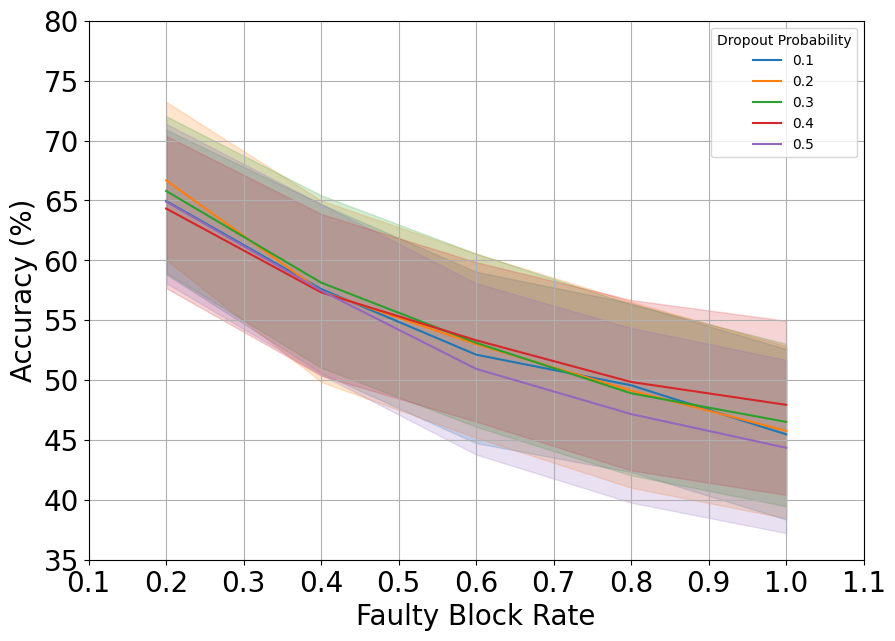

In [58]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.grid()
sns.lineplot(data=Final_report.query('bit_faulty_pos==23 or bit_faulty_pos==24 or bit_faulty_pos==25'), x='block_fault_rate', y='fault_ACC@1', hue='Dropout Probability', palette='tab10')

ax.set_xlabel('Faulty Block Rate', fontsize=20)

ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), fontsize=20)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=20)
ax.set_ylabel('Accuracy (%)', fontsize=20)

## SDC + Criticals predictions

This is also an important metric to see when the model looks "overconfident"

https://link.springer.com/article/10.1007/s10278-022-00735-3
https://arxiv.org/pdf/2205.09310

In [67]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir('/leonardo/home/userexternal/gesposi1/dropout_rel_assessment')
PWD=os.getcwd()
print(PWD)

PATH="./FSIM_N_HPC_ResnetDrop"

items = os.listdir(PATH) 

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)) and 'lyr0-20' in item)]

Final_report = pd.DataFrame()

for config in directories:
    merge_files_path = os.path.join(PATH,config)    

    confidence_report = pd.read_csv(os.path.join(merge_files_path,"Misclassified_images_report.csv"),index_col=[0])
    confidence_report['MRCD0'] = 100*(confidence_report['F_pred0']-confidence_report['G_pred0'])/confidence_report['G_pred0']
    confidence_report['MRCD1'] = 100*(confidence_report['F_pred1']-confidence_report['G_pred1'])/confidence_report['G_pred1']
    confidence_report['MRCD2'] = 100*(confidence_report['F_pred2']-confidence_report['G_pred2'])/confidence_report['G_pred2']
    confidence_report['MRCD2'] = 100*(confidence_report['F_pred2']-confidence_report['G_pred2'])/confidence_report['G_pred2']
    confidence_report['MRCD3'] = 100*(confidence_report['F_pred3']-confidence_report['G_pred3'])/confidence_report['G_pred3']
    confidence_report['MRCD4'] = 100*(confidence_report['F_pred4']-confidence_report['G_pred4'])/confidence_report['G_pred4']

    # Final_report=pd.concat([Final_report,confidence_report],axis=0,ignore_index=True)



/leonardo/home/userexternal/gesposi1/dropout_rel_assessment


In [68]:
confidence_report['MRCD0'].describe()

count    6.015800e+04
mean     2.152732e+36
std      8.650018e+36
min     -2.750809e+09
25%      3.211338e+03
50%      8.412061e+08
75%      4.306265e+17
max      2.862088e+38
Name: MRCD0, dtype: float64

In [62]:
confidence_report['F_pred1']

0        4.881843
1        8.347312
2        4.938555
3        5.176704
4        2.402360
           ...   
71663    2.011642
71664    2.959494
71665    1.995504
71666    2.361449
71667    2.798340
Name: F_pred1, Length: 71668, dtype: float64